# Titanic 🌊🚢

🦾 The Goal is to develop prediction models able to identify people who survived from the sinking of the Titanic, based on gender, age, and ticketing information.

📈There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.


In [1]:
# imports of libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Overview of the data set 


In [2]:
train_data = pd.read_csv ("train.csv")
train_data.head() #to show the first five rows 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv ("test.csv")
test_data # to get a view of the table 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# Statistical info 
train_data.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#data type info 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory data analysis 



<AxesSubplot:title={'center':'Survival Counts'}, ylabel='Count'>

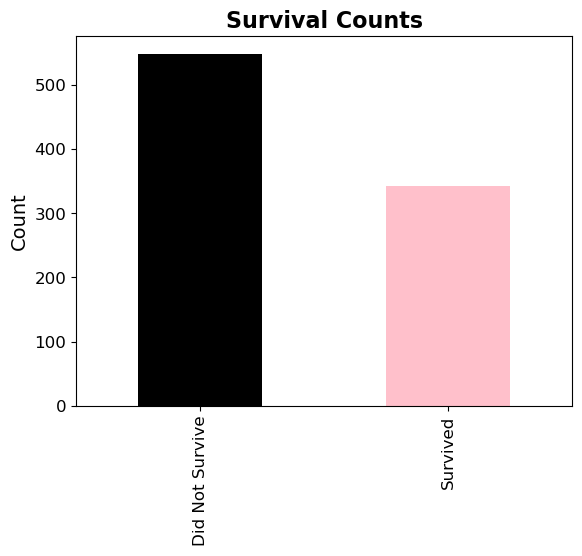

In [6]:
# Categorical Attributes


# survived or not 
survived_counts = train_data['Survived'].value_counts()
graph_one=survived_counts.plot.bar(color=['black', 'pink'])
plt.title('Survival Counts', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], fontsize=12)
plt.yticks(fontsize=12)

graph_one 




<AxesSubplot:title={'center':'Distribution of gender among passengers'}, ylabel='Count'>

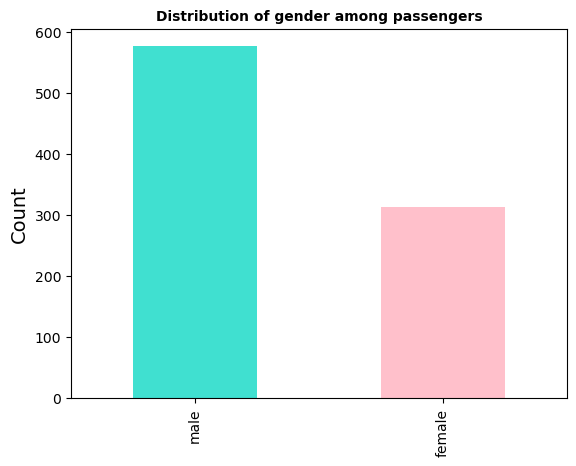

In [7]:

# Now let's how many men and women were on the ship

gender= train_data['Sex'].value_counts()
graph_two= gender.plot.bar(color=['turquoise','pink'])
plt.title('Distribution of gender among passengers', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=14)


graph_two




In [8]:
#Now we want to know the percentage of men and women that survived 
# Explore a pattern
# Remmeber that the sample submission assumes that all women survived and all males died 

women = train_data.loc[train_data.Sex== 'female']["Survived"]
rate_women= sum(women)/ len(women)

sum (women) #number of women that survived

sum(women)/len(women)   # ratio of women that survived 

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [9]:
male = train_data.loc[train_data.Sex== 'male']["Survived"]
rate_male= sum(male)/ len(male)

sum (male) #number of women that survived

sum(male)/len(male)   # ratio of women that survived 

print("% of women who survived:", rate_male)

# here we see that women survived more than men ( as expectec also)
# Women and children first!!!!

% of women who survived: 0.18890814558058924


<AxesSubplot:title={'center':'Distribution of people among classes'}>

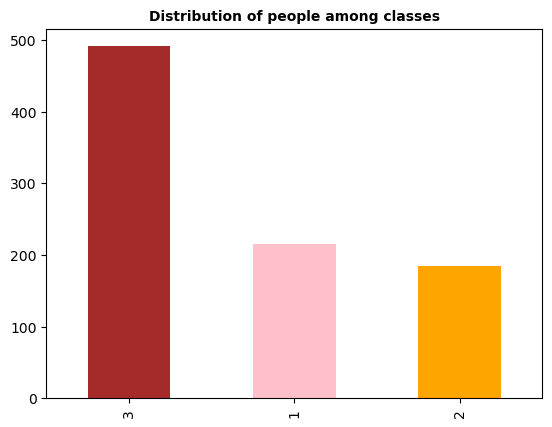

In [10]:

#now we want to know the distrubution of people among the different classes
classe= train_data['Pclass'].value_counts()
graph_three = classe.plot.bar(color= ['brown', 'pink', 'orange'])
plt.title('Distribution of people among classes', fontsize=10, fontweight='bold')

graph_three

#  we see here that most passengers were in the third class 

<AxesSubplot:>

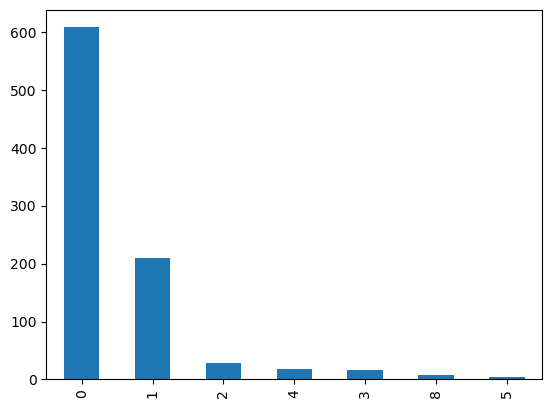

In [11]:
# Next, we will move to the number of siblings that were together in the ship 
fam= train_data ['SibSp']. value_counts()
graph_four= fam.plot.bar()
graph_four

#we can see that most of the passengers were alone

Text(0.5, 1.0, 'Distribution of the age of the passengers')

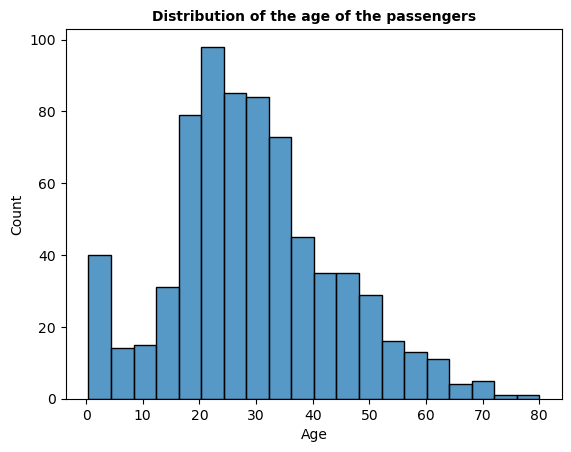

In [12]:
# Now we will do the same work but
# with NUMERICAL ATTRIBUTES


# we start with the age 
sns.histplot (train_data['Age'])  
plt.title('Distribution of the age of the passengers', fontsize=10, fontweight='bold')


# the output resembles a bell-ring shape where most people where between 20 and 30 years old

Text(0.5, 1.0, 'Distribution of fare paid for the trip')

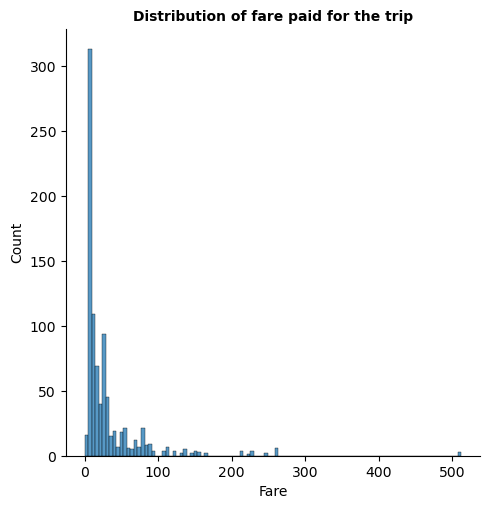

In [13]:

# now we focus on fare 
sns.displot (train_data['Fare'])
plt.title('Distribution of fare paid for the trip', fontsize=10, fontweight='bold')

# for the fare we notice that it's randing from 0 to 500 and most of the fares are 20-50
# we def need to do some preprocessing for the fare if we want to include it in the training data 
# we would need to transform this right skewed grpah into a uniform bell curve 




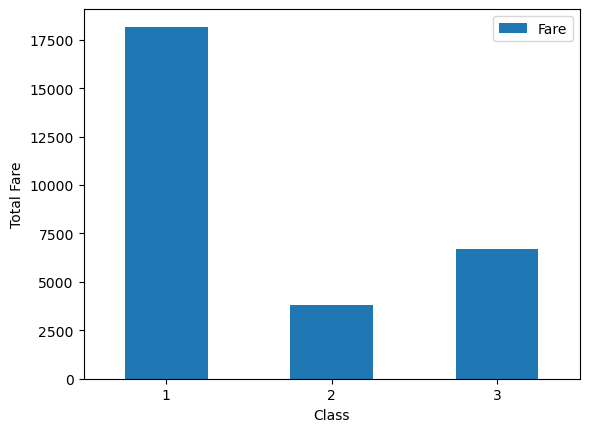

In [14]:
# I want to compare the class with the ticket price 
class_fare= train_data.pivot_table( index='Pclass', values= 'Fare', aggfunc= np.sum)
class_fare.plot(kind= 'bar')
plt.xlabel('Class')
plt.ylabel ('Total Fare')
plt.xticks(rotation=0)
plt.show()

# we can see that the first class has a waaaay higher price than the other classes
# it all makes sense 

## Data Preprocessing ✨

In [15]:
# We will start by combining the two dataframes of test and train data

df= pd.concat([train_data, test_data], axis= 0)  # combine the test&train data in order to do the processing in a more efficient way
df= df.reset_index( drop= True )  # not really needed for our case - just to reset the indexing- 
df.head()
df.tail()   # to check for null values 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:

# explore null values for data cleaning

df.isnull().sum()   # issue for cabin

# Output: the variables that are concerned with the null values are the following:
# Survived, Age, Cabin, Embarked, and Fare


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:

#fill missing values using mean of that column ( for numerical columns)
df['Age']= df['Age'].fillna(df['Age'].mean())
df['Age'].mean()
 
df['Fare']= df['Fare'].fillna(df['Fare'].mean())


# now only one left is fill null values of embark  ( for categorical columns)
df['Embarked'].mode()[0]
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

# same with survival statut
df['Survived']= df['Survived'].fillna(df['Survived'].mode()[0])
df = df.drop(columns=['Cabin'])

In [21]:
# check that the data frame is now cleaned 
df.isnull().sum() 
# we notice here that our dataframe has no null values! Wohooo!!

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

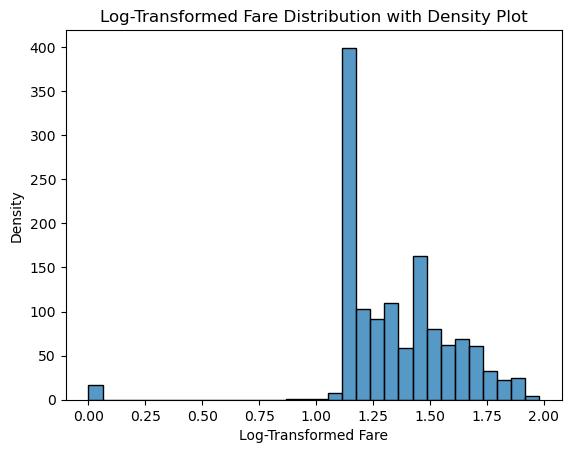

In [22]:
# Apply log transformation
df['Fare'] = np.log(df['Fare'] + 1)  # Use log1p for numerical stability

# Plot the histogram with density and KDE
sns.histplot(df['Fare'])

# Customize plot appearance
plt.title('Log-Transformed Fare Distribution with Density Plot')
plt.xlabel('Log-Transformed Fare')
plt.ylabel('Density')
plt.show()

## Correlation Matrix 

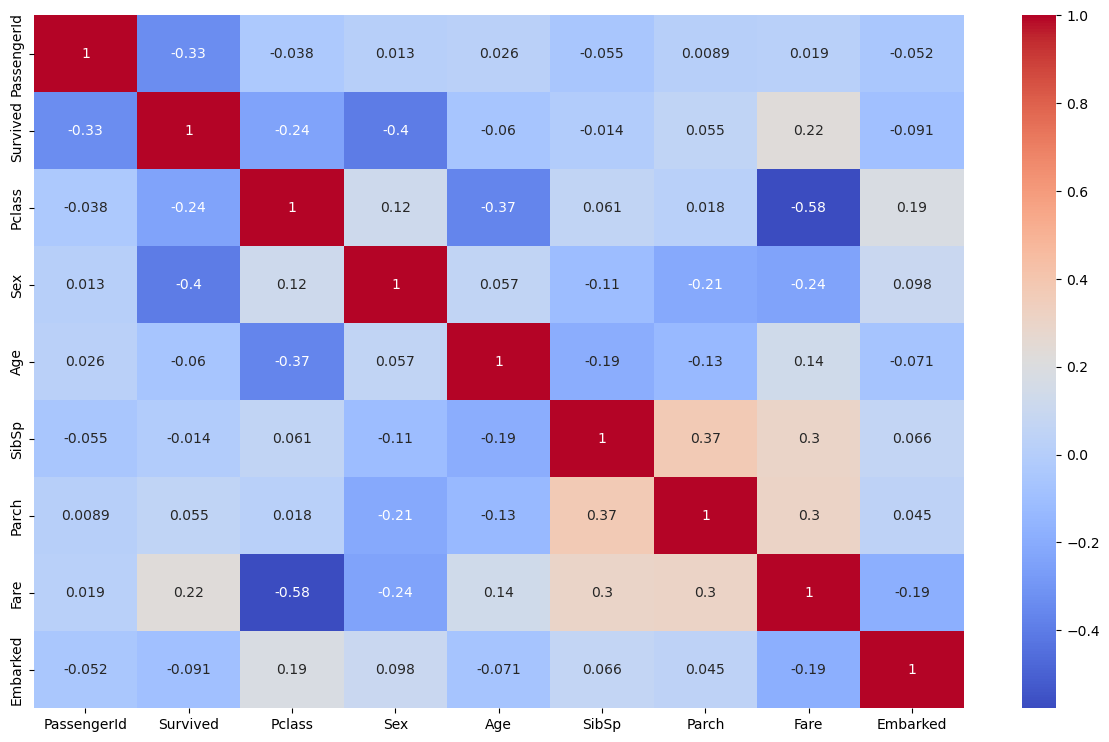

In [60]:
# Now correlation matrix 

df_encoded = pd.get_dummies(df, drop_first=True)
corr= df_encoded.corr()
plt.figure(figsize=(15,9))

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

# FINDINGS ( takes some time to run-to review after getting output)
# fare and pclass are correlated 
# pclass and surved status are also correlated
# also survived and fare are correlated 

### Little Analysis from the Correlation Matrix 

#### Key Observations:
1. **Strongest Correlations:**
   - **Fare and Survived (0.33):** Indicates a positive relationship. Passengers who paid higher fares were more likely to survive.
   - **Pclass and Fare (-0.69):** Strong negative correlation, as higher classes (lower numerical value in `Pclass`) are associated with higher fares.

2. **Weaker Correlations:**
   - **Age and Survived (-0.07):** Almost no relationship between age and survival.
   - **SibSp and Survived (-0.035):** Little to no relationship between the number of siblings/spouses aboard and survival.
   - **Parch and Survived (0.082):** Slight positive correlation, but it’s weak and might not be significant.

3. **Irrelevant Features:**
   - **PassengerId:** No meaningful correlation with any other variable because it’s just an identifier.
   -  **TicketNumber** Also has no meaningful correlation with any variable
   -  **Cabinnumber** has already been dropped earlier as it had a lot of missing values and was not relevant for our study

In [23]:
## drop unnecessary columns

df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,1.134691,S
1,2,1.0,1,female,38.0,1,0,1.664038,C
2,3,1.0,3,female,26.0,0,0,1.159662,S
3,4,1.0,1,female,35.0,1,0,1.607603,S
4,5,0.0,3,male,35.0,0,0,1.164014,S


## Label Encoding 


In [24]:
# Goal: turn categorical data into numerical values for the processing 
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


## Train-Test Split

In [25]:
#input split
train_len= len(train_data)
train_data = df.iloc[:train_len, :]
test_data = df.iloc[train_len:, :]
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


In [36]:
# input split
X = train_data.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_data['Survived']

## Model Training 🏋🏻‍♀️

    

In [37]:

from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))    

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.790157554453581


In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.726457399103139
CV Score: 0.7733098989391751


## Complete Model Training with Full Data

NB: The LGBM model showed the highest accuracy!

In [49]:
# Train data on full model
model= LGBMClassifier()
model.fit(X,y)
test_data.head()

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0.0,3,1,34.5,0,0,1.156272,1
892,893,0.0,3,0,47.0,1,0,1.124748,2
893,894,0.0,2,1,62.0,0,0,1.214638,1
894,895,0.0,3,1,27.0,0,0,1.184255,2
895,896,0.0,3,0,22.0,1,1,1.277267,2


In [54]:
X_test = test_data.drop(columns=['PassengerId', 'Survived'], axis=1)

In [55]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,1.156272,1
892,3,0,47.0,1,0,1.124748,2
893,2,1,62.0,0,0,1.214638,1
894,3,1,27.0,0,0,1.184255,2
895,3,0,22.0,1,1,1.277267,2


In [57]:
pred= model.predict(X_test) 
# store predictions in the survived columns of the dataframe 

## Test Submission



In [58]:
sub= pd.read_csv("gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [59]:
sub['Survived']= pred
sub.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0
